#### Exploratory Data Analysis and Model Building - Bank 

##### Problem Statement:

The task at hand is to develop a machine learning model that can predict whether a bank customer is likely to subscribe to a term deposit (fixed deposit) account or not. Term deposits are a key financial product offered by the bank, and understanding which customers are more likely to invest in them can significantly impact the bank's marketing and sales strategies.

The objective is to build a predictive model that can accurately classify whether a customer will subscribe to a term deposit based on the provided features. The model will be evaluated based on metrics such as accuracy, precision, recall, and F1-score.

The results of this predictive model will help the bank optimize marketing efforts, tailor product offerings, and improve customer engagement to increase term deposit subscriptions and overall revenue.

In [1]:
#lets import the required packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#lets import the Dataset of banking
 
data  = pd.read_csv(r"D:\TeraBoxDownload\Python\Capstone Project Updated\Capstone Project Updated\Machine Learning\BFSI\bank.csv")


In [3]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [4]:
#checking data structure
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [5]:
#check the number of rows and column
data.shape

(11162, 17)

In [6]:
#describe the data in numerical column
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [7]:
#lets understand categorical features and its unique values in the data

for col in data.select_dtypes(include='object').columns:
    print(col)
    print(data[col].unique())

job
['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']
marital
['married' 'single' 'divorced']
education
['secondary' 'tertiary' 'primary' 'unknown']
default
['no' 'yes']
housing
['yes' 'no']
loan
['no' 'yes']
contact
['unknown' 'cellular' 'telephone']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome
['unknown' 'other' 'failure' 'success']
deposit
['yes' 'no']


#### Exploratory Data Analaysis

- Find Unwanted Columns
- Find Missing Values
- Find Features with one value
- Explore the Categorical Feature Distribution
- Relationship between Categorical Features and Label
- Find Discrete Numerical Features
- Relation between Discrete numerical Features and Labels
- Find Continuous Numerical Features
- Distribution of Continuous Numerical Features
- Relation between Continuous Numerical Features and Labels
- Find Outliers in Numerical Features
- Explore the Correlation between numerical Features
- Find Pair Plot
- Check the Data set is balanced or not based on target values in classification


#### Find Unwanted Columns

* There is no unwanted columns present in given dataset to remove


#### Find Missing Values

In [8]:
#lets find missing values in the dataset
columns_na = [features for features in data.columns if data[features].isnull().sum()>0]
for feature in columns_na:
    print(feature)
else:
    print("No Missing value")

No Missing value


#### Replacing unwanted values

In [9]:
data['job'] = data['job'].str.replace('.', '')

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13988\2108700208.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['job'] = data['job'].str.replace('.', '')


#### Find Features with one value

In [10]:
for column in data.columns:
    print(column,data[column].nunique())

 

age 76
job 12
marital 3
education 4
default 2
balance 3805
housing 2
loan 2
contact 3
day 31
month 12
duration 1428
campaign 36
pdays 472
previous 34
poutcome 4
deposit 2


Now we know that there is No feature with only one value.

#### Explore the Categorical Feature

In [11]:
categorical = [feature for feature in data.columns if ((data[feature].dtypes =='O')&(feature not in ['deposit']))]
categorical

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [12]:
for feature in categorical:
    print('The feature is {} and number of categories are {}'.format(feature,len(data[feature].unique())))

The feature is job and number of categories are 12
The feature is marital and number of categories are 3
The feature is education and number of categories are 4
The feature is default and number of categories are 2
The feature is housing and number of categories are 2
The feature is loan and number of categories are 2
The feature is contact and number of categories are 3
The feature is month and number of categories are 12
The feature is poutcome and number of categories are 4


* There are 9 categorical values
* Feature job and month has highest number of categorical values

#### Find  Categorical Feature Distribution

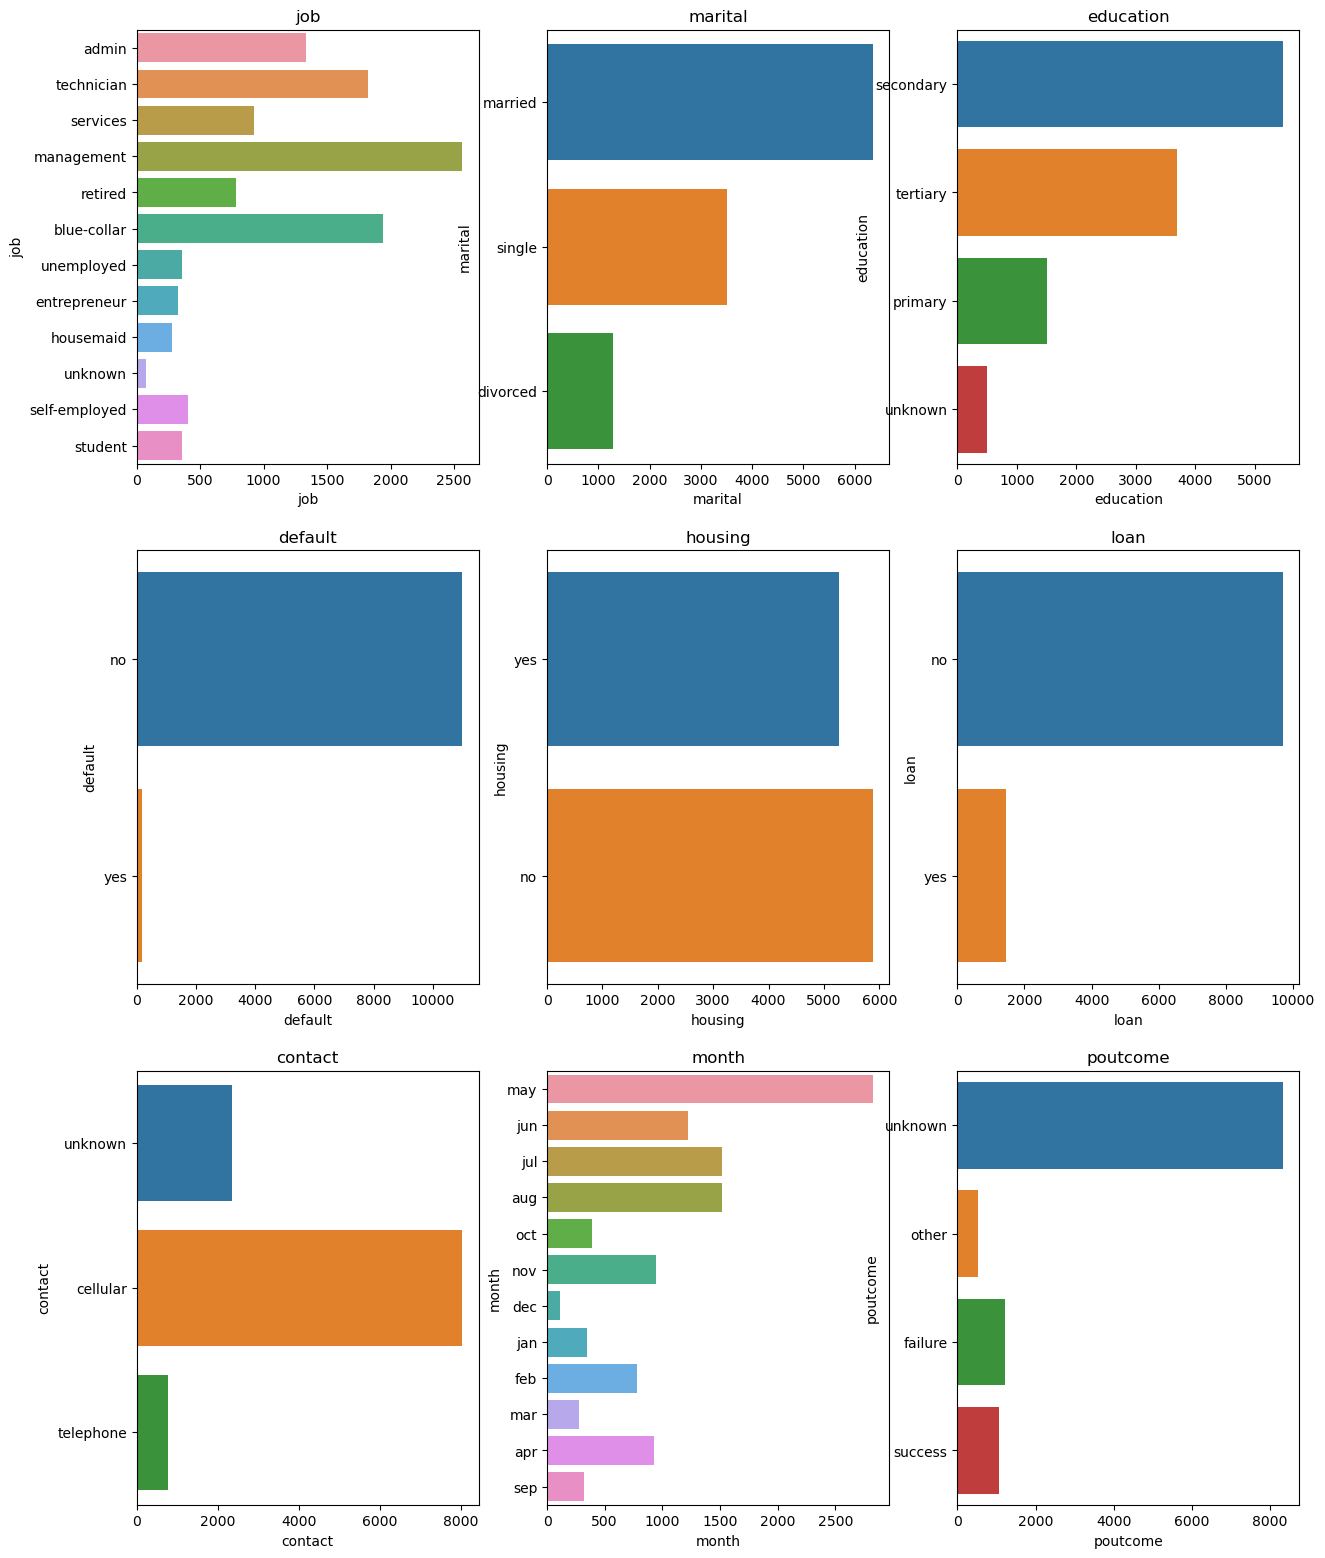

In [13]:
#Check count based on categorical features
plt.figure(figsize = (15,80),facecolor = 'white')
plotnumber = 1

for categorical_feature in categorical:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y = categorical_feature,data=data)
    plt.xlabel(categorical_feature)
    plt.title(categorical_feature)
    plotnumber+=1
plt.show()

* Client with job type as management records are high in given dataset and housmaid are very less
* client who married are high in records in given dataset and divorced are less
* client whoes education background is secondary are in high numbers in given dataset
* default feature seems to be does not play important role as it has value of no at high ratio to value yes which can be dropped
* data in month of may is high and less in december

#### Relationship between Categorical Features and Label

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'admin'),
  Text(1, 0, 'technician'),
  Text(2, 0, 'services'),
  Text(3, 0, 'management'),
  Text(4, 0, 'retired'),
  Text(5, 0, 'blue-collar'),
  Text(6, 0, 'unemployed'),
  Text(7, 0, 'entrepreneur'),
  Text(8, 0, 'housemaid'),
  Text(9, 0, 'unknown'),
  Text(10, 0, 'self-employed'),
  Text(11, 0, 'student')])

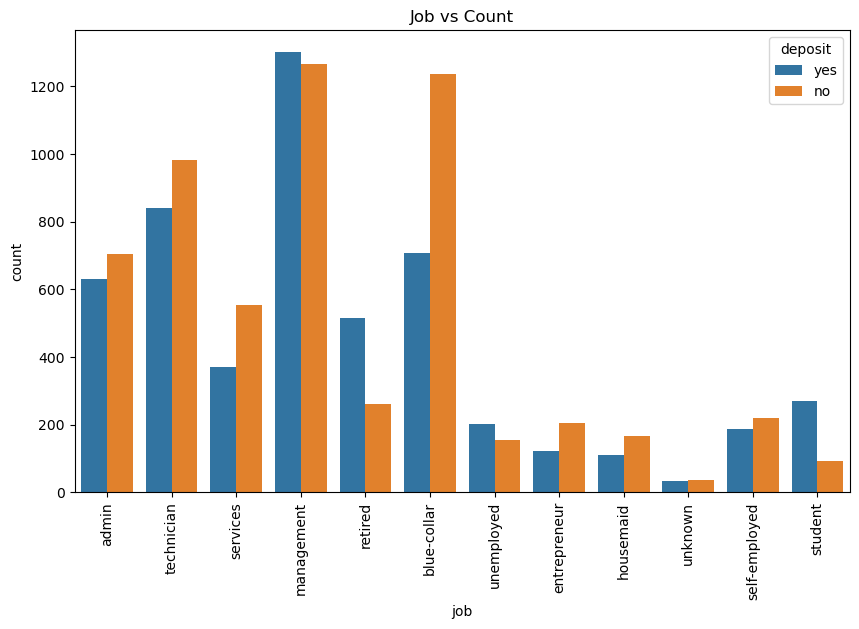

In [14]:
#count plot for job vs count
plt.figure(figsize=(10, 6))
sns.countplot(x="job", data = data, hue ="deposit")
plt.title("Job vs Count")
plt.xticks(rotation=90)

* It seems like more number of people working in management profiles have subscribed to term deposits
* There is a positive correlation between having a deposit and the job type. This means that people who have a deposit are more likely to have certain types of jobs than those who do not have a deposit.



Text(0.5, 1.0, 'personal loan vs Count')

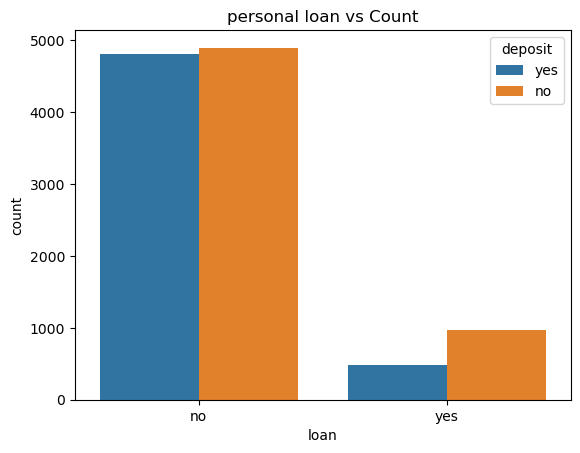

In [15]:
#countplot for loan and deposit
sns.countplot(x="loan", data = data, hue ="deposit")
plt.title("personal loan vs Count")

* There is a negative correlation between taking out a personal loan and making a deposit. This means that people who have a personal loan are less likely to make a deposit than those who do not have a personal loan.
* The majority of the people in the data set do not have a personal loan. This could indicate that personal loans are not very common or popular among the customers.

Text(0.5, 1.0, 'Education type vs Count')

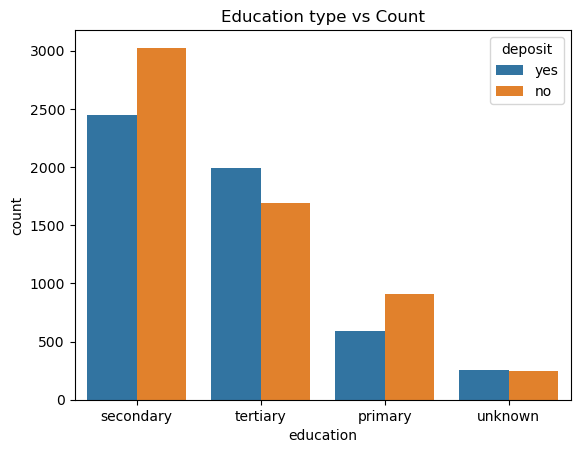

In [16]:
#countplot for education and deposit

sns.countplot(x="education",data=data, hue = "deposit")
plt.title("Education type vs Count")

* The education level is related to the likelihood of making a deposit. 
* People with higher education levels are more likely to make a deposit than those with lower or unknown education levels.
* The secondary education level has the highest count of people who have made a deposit, followed by the tertiary education level. 
* This could indicate that most of the customers have a moderate level of education and income.


Text(0.5, 1.0, 'Martial Status vs Count')

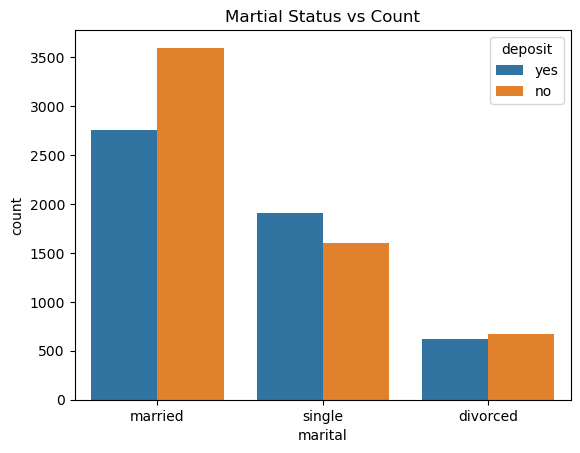

In [17]:
#countplot for marital status and deposit

sns.countplot(x="marital", data = data,hue = "deposit")
plt.title("Martial Status vs Count")

* People who are married are more likely to make a deposit than those who are single or divorced.
* The married category has the highest count of people who have made a deposit, followed by the single and divorced categories
* This could indicate that most of the customers are in a stable relationship and have more financial security
* The divorced category has the lowest count of people who have made a deposit. 

Text(0.5, 1.0, 'housing loan vs Count')

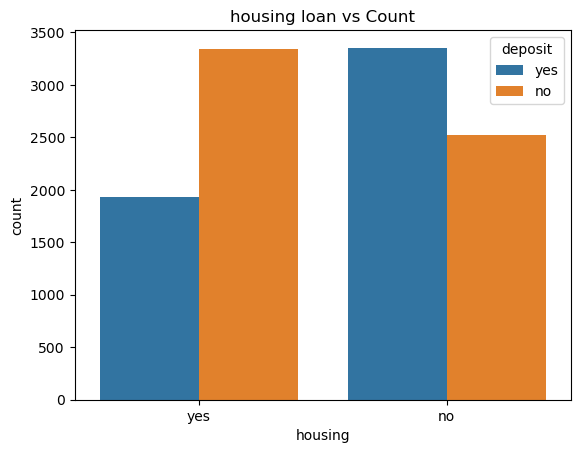

In [18]:
#countplot for housing loan and deposit

sns.countplot(x="housing", data = data, hue ="deposit")
plt.title("housing loan vs Count")

* Most people who have a housing loan have also made a deposit, while most people who do not have a housing loan have not made a deposit
* The difference between the number of people who have made a deposit and those who have not is smaller for those who have a housing loan than for those who do not.

Text(0.5, 1.0, 'Contact vs Count')

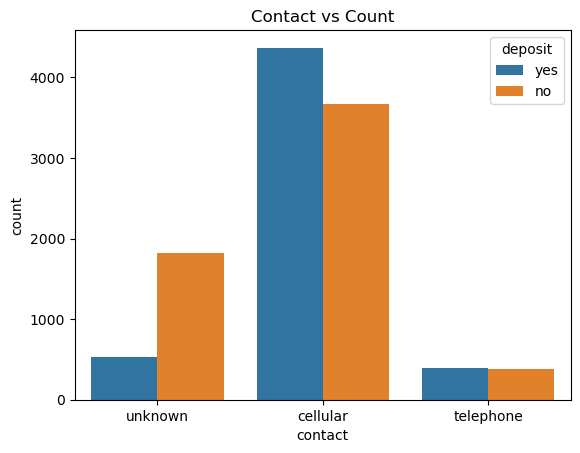

In [19]:
#countplot for Contact and deposit
sns.countplot(x="contact", data = data, hue ="deposit")
plt.title("Contact vs Count")

* The most common contact method for people who have made a deposit is cellular, while the least common is telephone. 
* The graph suggests that using cellular contact may increase the likelihood of making a deposit, or vice versa.

#### Explore the Numerical features

In [20]:
# List of numerical variables
numerical_features = data.select_dtypes(include=['number']).columns.tolist()

print("Number of numerical variables: ", len(numerical_features))

# Visualize the numerical variables
data[numerical_features].head()

Number of numerical variables:  7


,age,balance,day,duration,campaign,pdays,previous
0,59,2343,5,1042,1,-1,0
1,56,45,5,1467,1,-1,0
2,41,1270,5,1389,1,-1,0
3,55,2476,5,579,1,-1,0
4,54,184,5,673,2,-1,0


#### Find continous Numerical Features

In [21]:
 # List of continuous numerical features
continuous_features = [feature for feature in numerical_features if len(data[feature].unique()) > 20]

print("Continuous numerical features:",len(continuous_features))
print(continuous_features) 

Continuous numerical features: 7
['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


#### Distribution of  continous Numerical Features

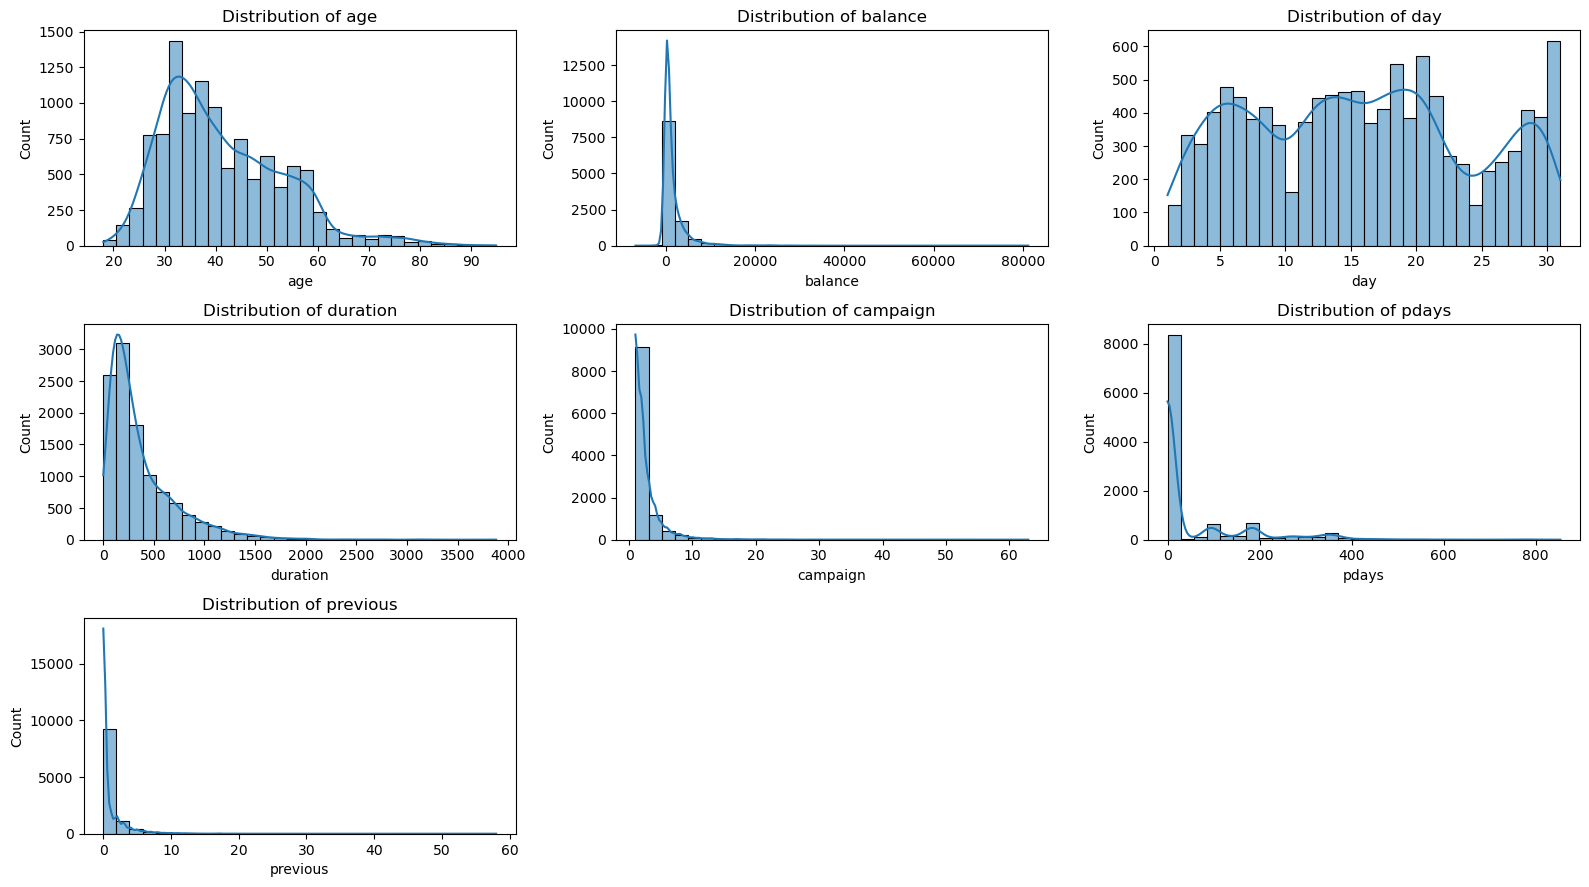

In [22]:
num_subplots = len(continuous_features)

# Set the figure size
plt.figure(figsize=(16, 5 * num_subplots))

# Loop through each continuous feature and create a histogram
for i, feature in enumerate(continuous_features):
    plt.subplot(12, 3, i+1)
    sns.histplot(data=data, x=feature, bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)

plt.tight_layout()
plt.show()

* It seems age, days distributed normally
* Balance, duration, campaign, pdays and previous heavily skewed towards left and seems to be have some outliers

#### Relation between continous numerical features and Lables

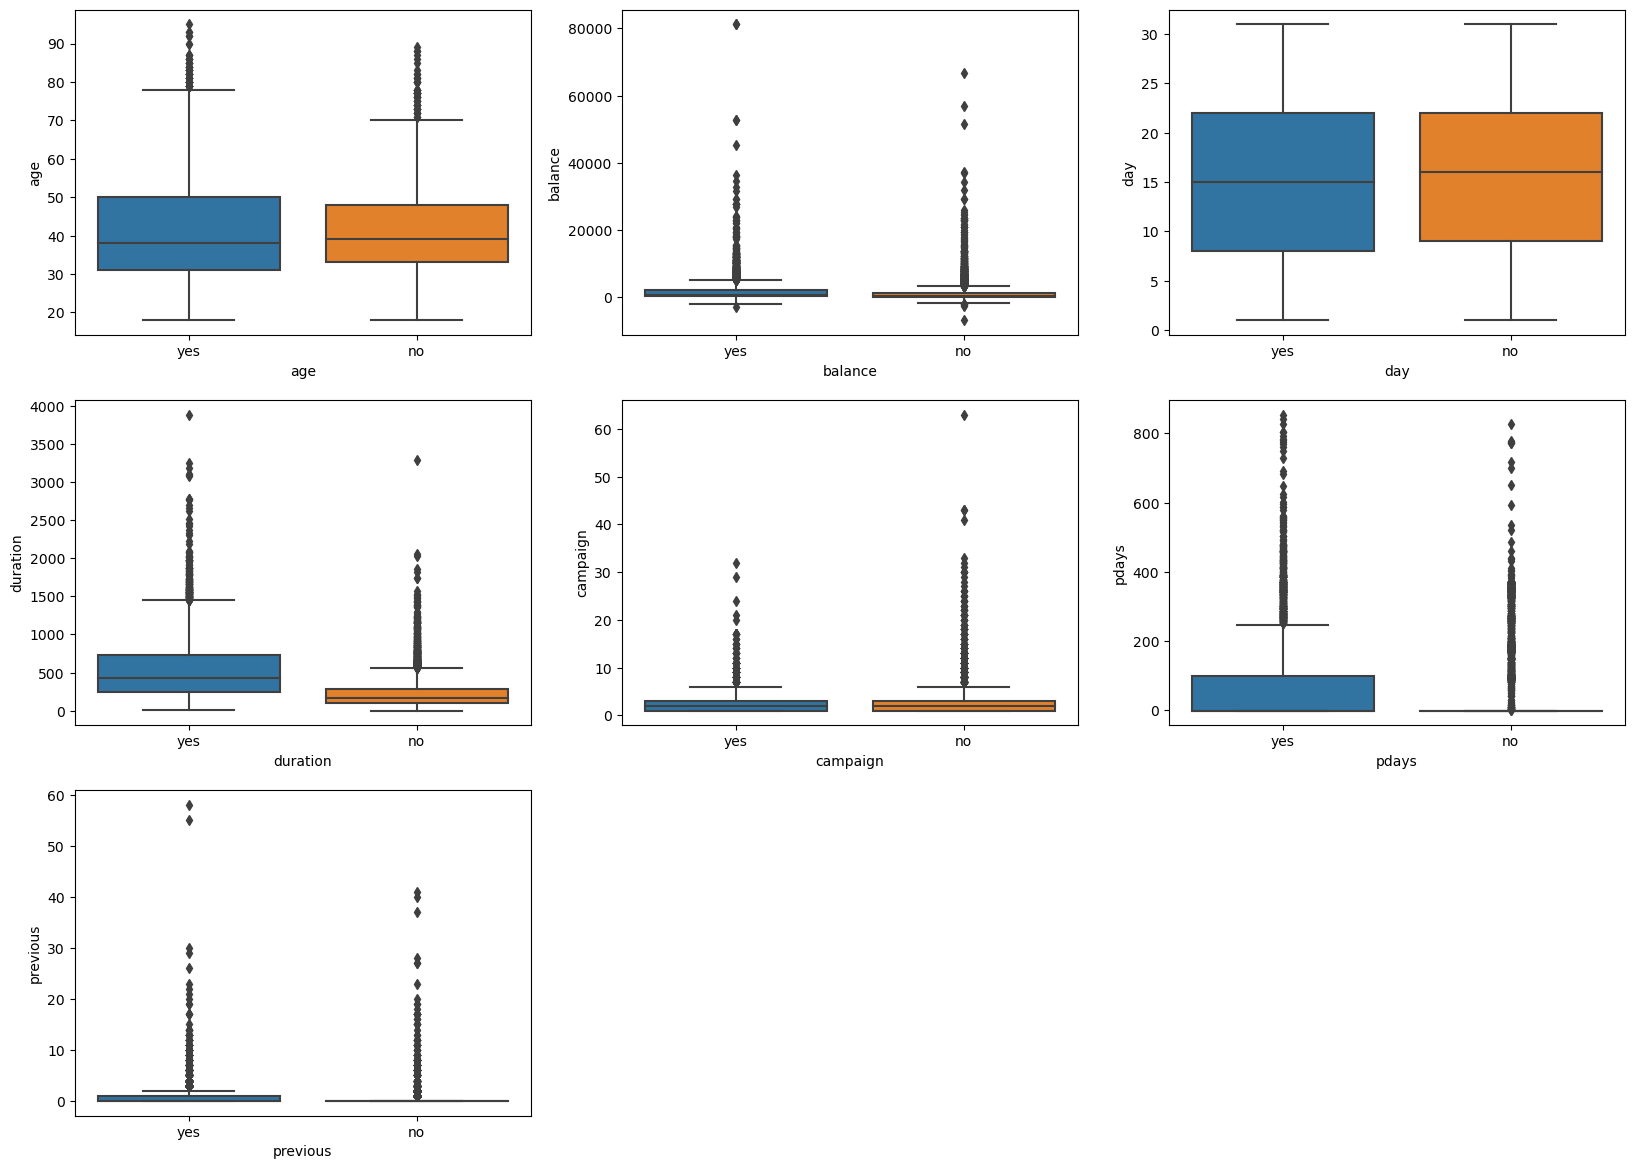

In [23]:
#boxplot to show target distribution with respect numerical features

plt.figure(figsize=(20,60),facecolor = 'white')
plotnumber = 1
for feature in continuous_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(x='deposit',y = data[feature],data=data)
    plt.xlabel(feature)
    plotnumber+=1
plt.show()

* Customer showws interesst on deposit who had discussion for longer duration.
* The median age of customers who subscribed is higher than those who did not.
* The median balance of customers who subscribed is higher than those who did not.
* The median campaign of customers who subscribed is lower than those who did not

#### Find outliers in numerical features

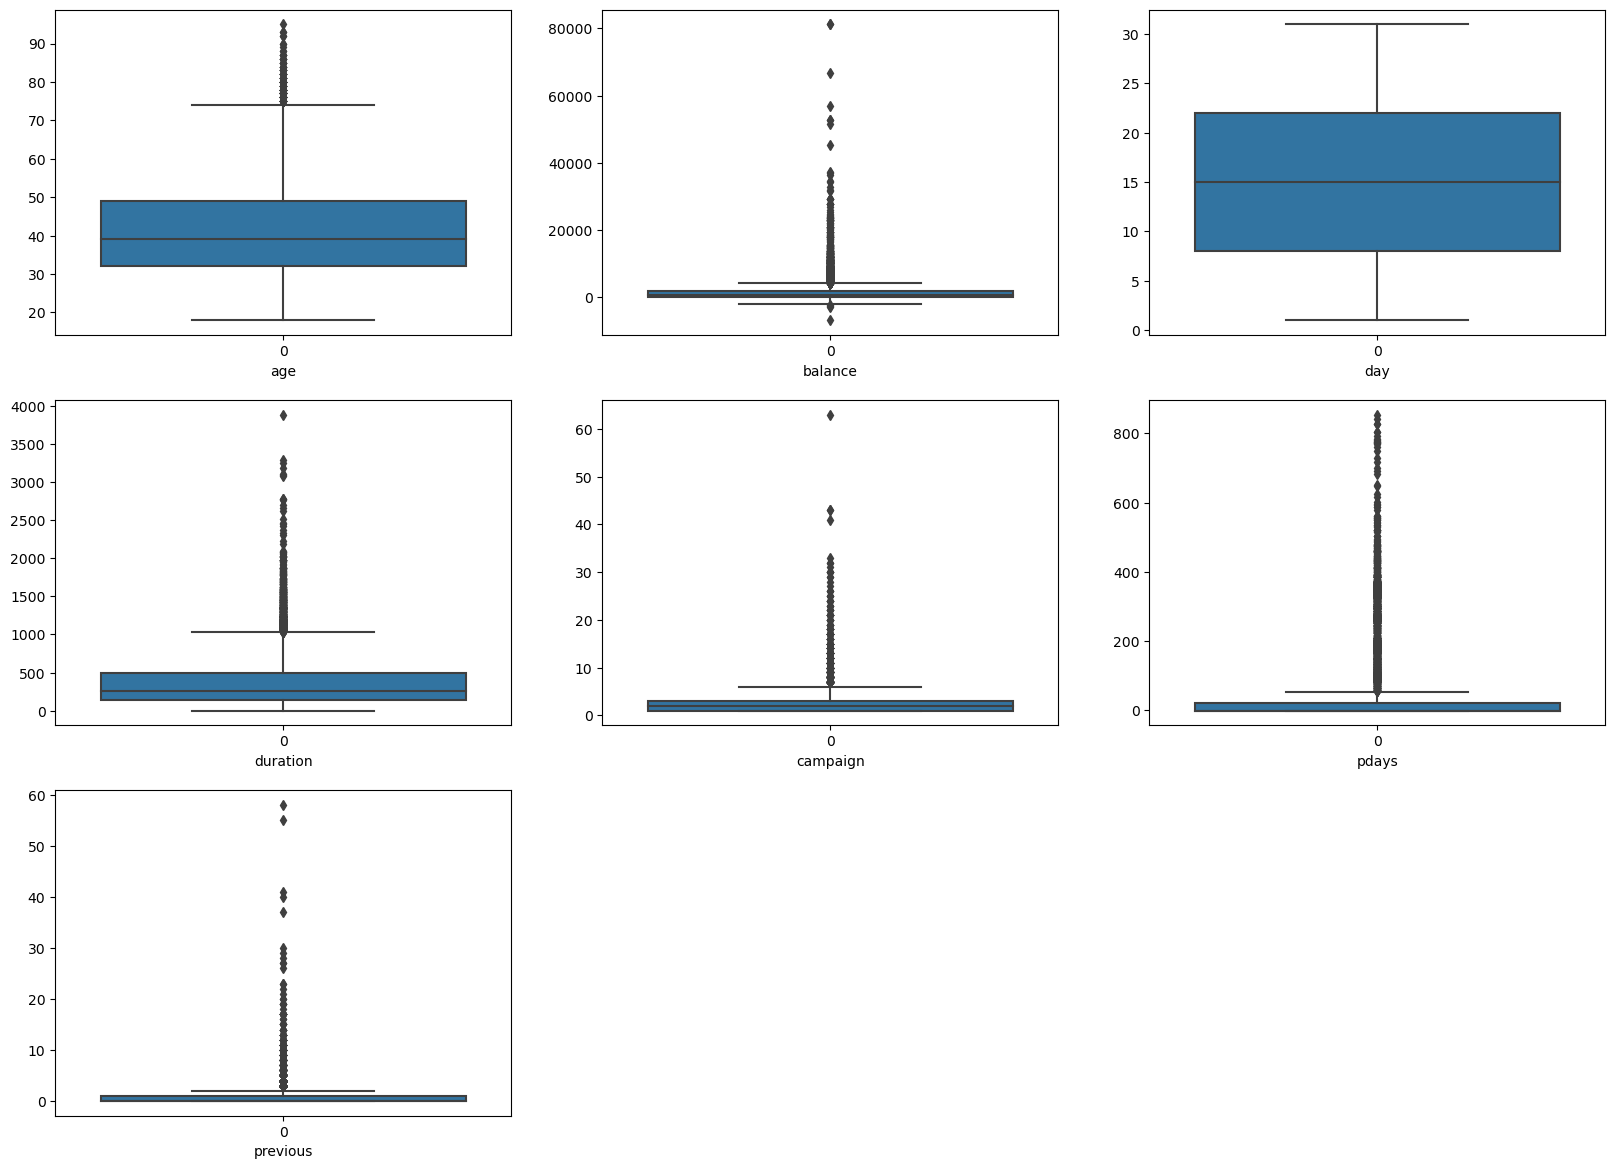

In [24]:
#botplot on numerical features to find outliers
plt.figure(figsize = (20,60),facecolor = 'white')
plotnumber = 1
for numerical_feature in numerical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(data[numerical_feature])
    plt.xlabel(numerical_feature)
    plotnumber+=1
plt.show()
    

* Age, balance, duration, campaign, pdays, and previous has some outliers

### Correlation Heatmap of Data Features

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13988\2220516643.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


<Axes: >

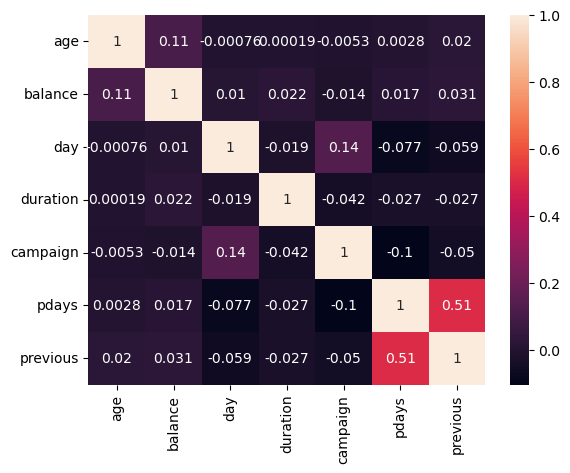

In [67]:
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot =True)

* The chart shows the correlation between different variables related to some people’s banking behavior.
* The chart indicates that most variables have low or no correlation with each other, as shown by the white cells.
* The only variables that have a moderate positive correlation are duration and deposit, as shown by the light blue cell. This means that people who have longer calls with the bank are more likely to make a deposit.
* The only variables that have a moderate negative correlation are pdays and deposit, as shown by the light red cell. This means that people who have been contacted by the bank more recently are less likely to make a deposit.

#### Check the Data set is balanced or not based on target values in classification

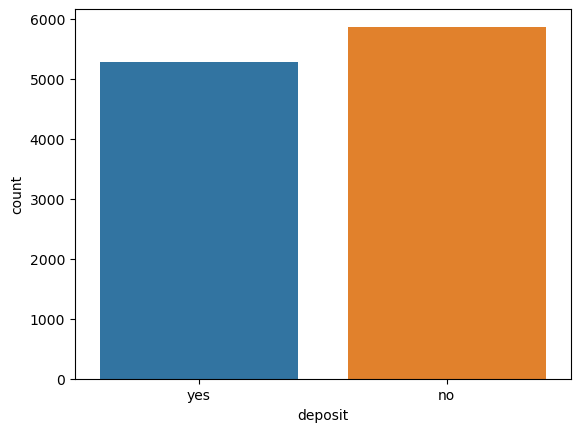

In [26]:
#total count of deposits subscribed and not subscribes
sns.countplot(x='deposit',data = data)
plt.show()

In [27]:
data['deposit'].groupby(data['deposit']).count()

deposit
no     5873
yes    5289
Name: deposit, dtype: int64

* Give dataset seems to be balanced

#### Feature Engineering

* Drop unwanted features
* Handle Missing Values
* Handle Categorical Features
* Handle Feature scalling
* Remove Outliers

As per Exploratory Data Analysis EDA
 
 * No missing values found
 * No feature found with one value
 * 9 Categorical features
 * Default features does not play important role
 * It seems some outliers found (Age, balance, duration, campaign, pdays, and previous)

In [28]:
# lets make a copy of data 
data1 = data.copy()

In [29]:
data1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [30]:
#lets check if default features does not play important role
data1.groupby(['deposit','default']).size()

deposit  default
no       no         5757
         yes         116
yes      no         5237
         yes          52
dtype: int64

In [31]:
#lets drop the default feature
data1.drop(['default'],axis = 1,inplace = True)

In [32]:
#lets check if pdays features does not play important role
data1.groupby(['deposit','pdays']).size()

deposit  pdays
no       -1       4940
          1          2
          2          6
          5          2
          6          2
                  ... 
yes       804        1
          805        1
          828        1
          842        1
          854        1
Length: 732, dtype: int64

In [33]:
#lets drop pdays as it has -1 value for around 40% and above
data1.drop(['pdays'],axis = 1,inplace = True)

In [34]:
#remove outliers in feature age
data1.groupby('age',sort = True)['age'].count()

age
18     8
19    13
20    20
21    30
22    48
      ..
89     1
90     2
92     2
93     2
95     1
Name: age, Length: 76, dtype: int64

* These can be ignored and values lies in between 18 to 95

In [35]:
#remove outliers in feature balance
data1.groupby(['deposit', 'balance'],sort=True)['balance'].count()

deposit  balance
no       -6847      1
         -2712      1
         -2282      1
         -2049      1
         -1965      1
                   ..
yes       34646     1
          36252     1
          45248     1
          52587     2
          81204     2
Name: balance, Length: 5082, dtype: int64

* These outliers should not be removed as balance goes high, client show interest on deposit

In [36]:
# removing outliers in feature duration
data1.groupby(['deposit','duration'],sort=True)['balance'].count()

deposit  duration
no       2           1
         3           1
         4           2
         5           4
         6           6
                    ..
yes      3094        1
         3102        1
         3183        1
         3253        1
         3881        1
Name: balance, Length: 2157, dtype: int64

* These outliers should not be removed as duration goes high, client show interest on deposit

In [37]:
#remove outliers in feature capaign..
data1.groupby(['deposit','campaign'],sort=True)['campaign'].count()

deposit  campaign
no       1           2237
         2           1627
         3            703
         4            454
         5            239
         6            173
         7             92
         8             96
         9             51
         10            38
         11            24
         12            25
         13            24
         14            11
         15             9
         16             7
         17             8
         18             8
         19             5
         20             4
         21             7
         22             4
         23             3
         24             4
         25             3
         26             3
         27             1
         28             1
         29             1
         30             4
         31             1
         32             1
         33             1
         41             1
         43             2
         63             1
yes      1           2561
         2          

In [38]:
data2 = data1[data1['campaign']<33]

In [39]:
data2.groupby(['deposit','campaign'],sort=True)['campaign'].count()

deposit  campaign
no       1           2237
         2           1627
         3            703
         4            454
         5            239
         6            173
         7             92
         8             96
         9             51
         10            38
         11            24
         12            25
         13            24
         14            11
         15             9
         16             7
         17             8
         18             8
         19             5
         20             4
         21             7
         22             4
         23             3
         24             4
         25             3
         26             3
         27             1
         28             1
         29             1
         30             4
         31             1
         32             1
yes      1           2561
         2           1401
         3            618
         4            317
         5            139
         6          

In [40]:
#remove outliers in feature previous
data2.groupby(['deposit','previous'],sort=True)['previous'].count()

deposit  previous
no       0           4935
         1            304
         2            237
         3            141
         4             73
         5             44
         6             34
         7             23
         8             21
         9             10
         10             4
         11             8
         12             6
         13             2
         14             1
         15             4
         16             2
         17             8
         18             1
         19             2
         20             1
         23             1
         27             2
         28             1
         37             1
         40             1
         41             1
yes      0           3384
         1            583
         2            456
         3            294
         4            171
         5            121
         6             83
         7             54
         8             39
         9             24
         10         

In [41]:
data3 = data2[data2['previous']<33]

In [42]:
data3

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,deposit
0,59,admin,married,secondary,2343,yes,no,unknown,5,may,1042,1,0,unknown,yes
1,56,admin,married,secondary,45,no,no,unknown,5,may,1467,1,0,unknown,yes
2,41,technician,married,secondary,1270,yes,no,unknown,5,may,1389,1,0,unknown,yes
3,55,services,married,secondary,2476,yes,no,unknown,5,may,579,1,0,unknown,yes
4,54,admin,married,tertiary,184,no,no,unknown,5,may,673,2,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,1,yes,no,cellular,20,apr,257,1,0,unknown,no
11158,39,services,married,secondary,733,no,no,unknown,16,jun,83,4,0,unknown,no
11159,32,technician,single,secondary,29,no,no,cellular,19,aug,156,2,0,unknown,no
11160,43,technician,married,secondary,0,no,yes,cellular,8,may,9,2,5,failure,no


In [43]:
# List of categorical columns you want to one-hot encode
categorical_columns = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']

# Loop through each categorical column
for col in categorical_columns:
    # Drop the original categorical column from the DataFrame
    # and concatenate one-hot encoded columns in its place
    data3 = pd.concat(
        [
            data3.drop(col, axis=1),  # Drop the original column
            pd.get_dummies(  # Generate one-hot encoding
                data3[col],  # Column to one-hot encode
                prefix=col,  # Prefix for new column names
                prefix_sep='_',  # Separator for prefix and category name
                drop_first=True,  # Whether to drop the first category (to avoid multicollinearity)
                dummy_na=False  # Whether to include a column for missing values
            )
        ],
        axis=1  # Concatenate horizontally (along columns)
    )

In [44]:
# List of boolean columns you want to convert into numerical values
bool_columns = ['housing', 'loan', 'deposit']

# Loop through each boolean column
for col in bool_columns:
    # Create a new column with '_new' suffix to represent the boolean values as integers
    data3[col + '_new'] = data3[col].apply(lambda x: 1 if x == 'yes' else 0)

    # Drop the original boolean column as it's been replaced with the new numerical column
    data3.drop(col, axis=1, inplace=True)

In [45]:
data3.head()

,age,balance,day,duration,campaign,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,housing_new,loan_new,deposit_new
0,59,2343,5,1042,1,0,0,0,0,0,...,1,0,0,0,0,0,1,1,0,1
1,56,45,5,1467,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
2,41,1270,5,1389,1,0,0,0,0,0,...,1,0,0,0,0,0,1,1,0,1
3,55,2476,5,579,1,0,0,0,0,0,...,1,0,0,0,0,0,1,1,0,1
4,54,184,5,673,2,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1


#### Split Dataset into Training set & Test set

In [63]:
x = data3.drop(['deposit_new'],axis = 1)
y = data3['deposit_new']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 0)


#### Model Selection

In [77]:
#will try to use below two models that are RandomForestClassifier and XGBClassifier

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [78]:
#lets find the score for RandomForestClassifier
from sklearn.model_selection import cross_val_score
model_score = cross_val_score(estimator=RandomForestClassifier(),X=x_train,y=y_train,cv=5)
print(model_score)
print(model_score.mean())

[0.85378151 0.84809417 0.84865471 0.85201794 0.85257848]
0.8510253608169724


In [79]:
#lets find the score for XGBClassifier
from sklearn.model_selection import cross_val_score
model_score = cross_val_score(estimator=XGBClassifier(),X=x_train,y=y_train,cv=5)
print(model_score)
print(model_score.mean())

[0.85658263 0.85762332 0.85313901 0.85650224 0.86154709]
0.8570788584492093


In [74]:
# #create parameter
# model_parameter = {
#     'RandomForestClassifier':{
#         'model':RandomForestClassifier(),
#         'param':{
#             'n_estimators': [100, 200, 300],
#                 'max_depth': [None, 10, 20, 30],
#                 'min_samples_split': [2, 5, 10],
#                 'min_samples_leaf': [1, 2, 4],
#                 'max_features': ['auto', 'sqrt', 'log2']
#                     }
#     },
#     'XGBClassifier':{
#         'model':XGBClassifier(objective = 'binary:logistic'),
#         'param':{
#             'learning_rate': [0.5,0.1,0.01,0.001],
#             'max_depth': [3,5,10,20],
#             'n_estimators':[10,50,100,200]
#         }
#     }
# }

In [75]:
# #gridsearch

# score = []
# for model_name,mp in model_parameter.items():
#     model_selection = GridSearchCV(estimator = mp['model'],param_grid=mp['param'],cv=5,return_train_score=False)
#     model_selection.fit(x,y)
#     scores.append({
#         'model': model_name,
#         'best_score':model_selection.best_score_,
#         'best_params': model_selection.best_params_
#     })

#### Model Building

In [86]:
#as per above results, xgboost gives best result and hence selecting same to model building.
model_xgb = XGBClassifier(objective= 'binary:logistic',learning_rate=0.1,max_depth = 10,n_estimators=100)

In [87]:
model_xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [88]:
model_xgb.score(x_test,y_test)

0.8565665620797849

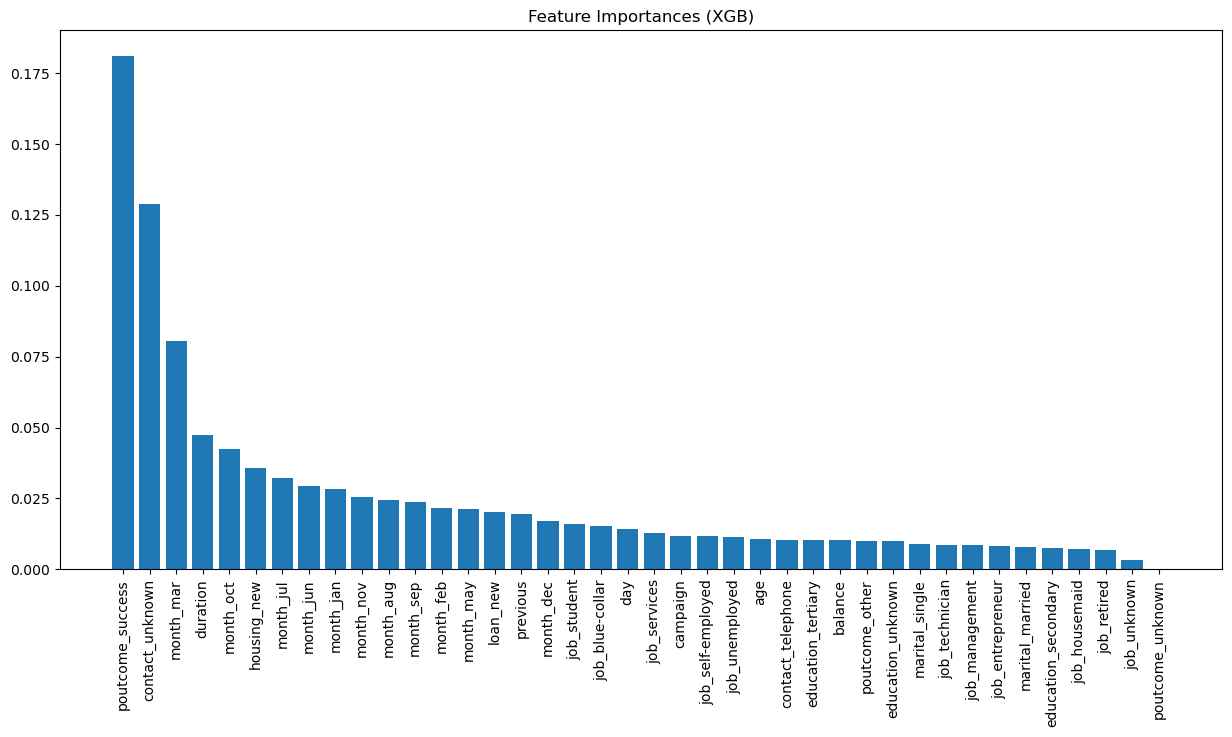

In [91]:
#lets get feature importances from the model
headers = ['name','score']
values = sorted(zip(x_train.columns,model_xgb.feature_importances_),key=lambda x:x[1]* -1)
xgb_features_importances = pd.DataFrame(values,columns = headers)

#plot feature importances
fig = plt.figure(figsize = (15,7))
x_pos = np.arange(0,len(xgb_features_importances))
plt.bar(x_pos,xgb_features_importances['score'])
plt.xticks(x_pos,xgb_features_importances['name'])
plt.xticks(rotation = 90)
plt.title('Feature Importances (XGB)')

plt.show()

#### Confusion Matrix

In [93]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,model_xgb.predict(x_test))
cm

array([[989, 190],
       [130, 922]], dtype=int64)

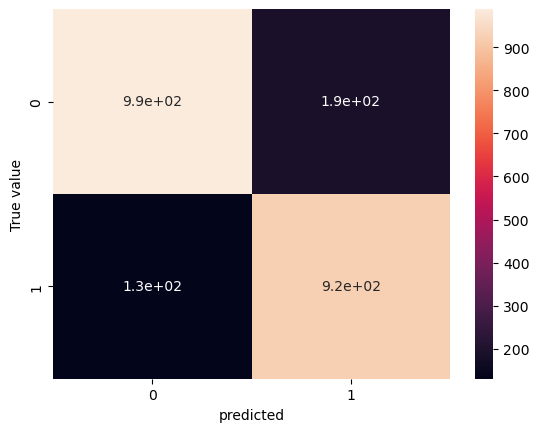

In [94]:
#plot the graph
from matplotlib import pyplot as plt
import seaborn as sns
sns.heatmap(cm,annot=True)
plt.xlabel('predicted')
plt.ylabel('True value')
plt.show()